<h1>Tâche 1 : Chargement des données</h1>

In [ ]:
import pandas as pd
import os 

df = pd.read_csv(os.getcwd() + '/../data/raw/data.csv')
# apercu
print('overview \n')
print(df.head)
# columns list
print('columns list \n')
print(df.columns)
# columns types
print('columns list \n')
print(df.dtypes)

# copy to an other file 
df.to_csv(os.getcwd() + '/../data/processed/pdata.csv')

overview 

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28     NaN  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>
columns list 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
columns list 

age        

<h1>Tâche 2 : Analyse exploratoire des données (EDA)</h1>

In [19]:
import pandas as pd
import os


df = pd.read_csv(os.getcwd() + "/../data/processed/pdata.csv")

# Comprendre la structure générale du jeu de données

# dimensions
print("Dataset dimensions:", df.shape)
# types de donnees
print("\nColumn types:\n", df.dtypes)
# apercu
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())



Dataset dimensions: (1338, 7)

Column types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28     NaN  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Last 5 rows:
       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.

In [20]:
import pandas as pd
import os


df = pd.read_csv(os.getcwd() + "/../data/processed/pdata.csv")

# Effectuer une analyse descriptive des données

print(df.describe())

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())






               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    323
Name: count, dtype: int64


In [21]:

import pandas as pd
import os


df = pd.read_csv(os.getcwd() + "/../data/processed/pdata.csv")

# Identifier les valeurs manquantes et les doublons


print(df[df.isnull().any(axis=1)])

print(df[df.duplicated()])


    age     sex    bmi  children smoker     region    charges
2    28     NaN  33.00         3     no  southeast  4449.4620
5    31  female  25.74         0    NaN  southeast  3756.6216
10   25    male  26.22         0     no        NaN  2721.3208
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


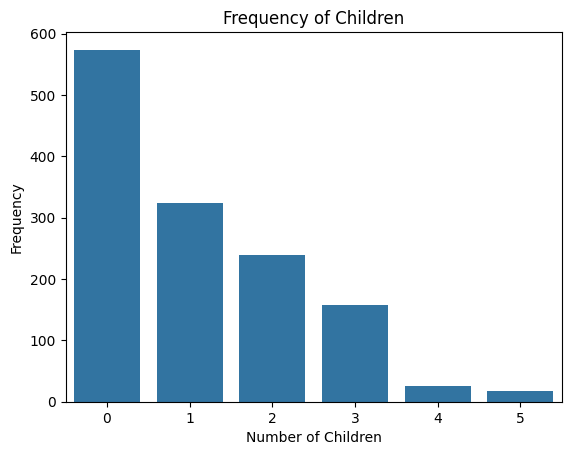

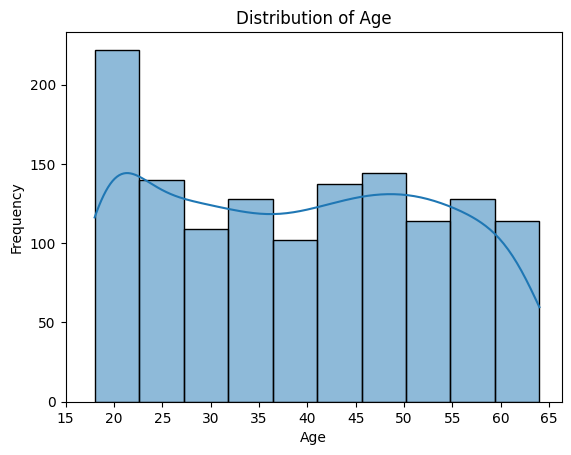

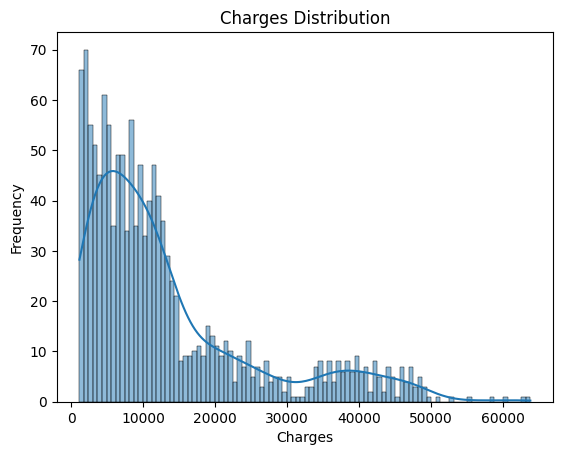

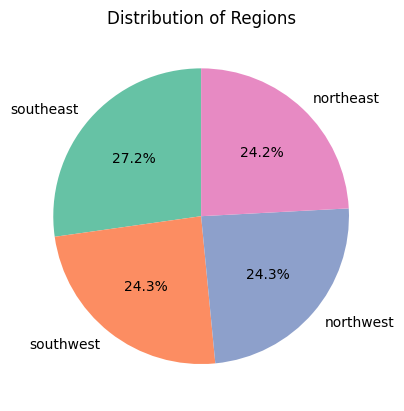

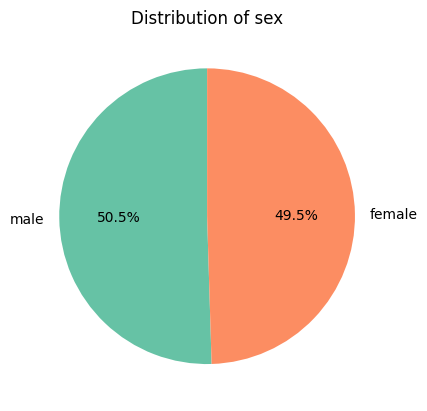

In [ ]:




import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


df = pd.read_csv(os.getcwd() + "/../data/raw/data.csv")


# Analyser la distribution des variables numériques

# children frequency
sns.countplot(x="children", data=df)
plt.title("Frequency of Children")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()

# age frequency
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(ticks=range(15, 70, 5))
plt.show()


# distibution of charges
sns.histplot(df['charges'], bins=100, kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# regions 
region_counts = df['region'].value_counts()

colors = sns.color_palette("Set2", n_colors=4)
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title("Distribution of Regions")
plt.show()

# sex
sex_counts = df['sex'].value_counts()

colors = sns.color_palette("Set2", n_colors=2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title("Distribution of sex")
plt.show()



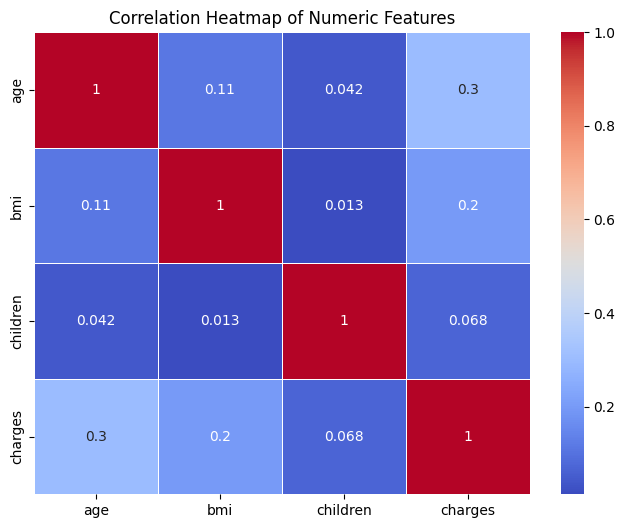

In [22]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


df = pd.read_csv(os.getcwd() + "/../data/raw/data.csv")

# Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations


corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<h1>Tâche 3 : Prétraitement des données</h1>

age         0
sex         1
bmi         0
children    0
smoker      1
region      1
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1
0


C:\Users\yassn\AppData\Local\Temp\ipykernel_16664\1689266004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median,inplace = True)
C:\Users\yassn\AppData\Local\Temp\ipykernel_16664\1689266004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

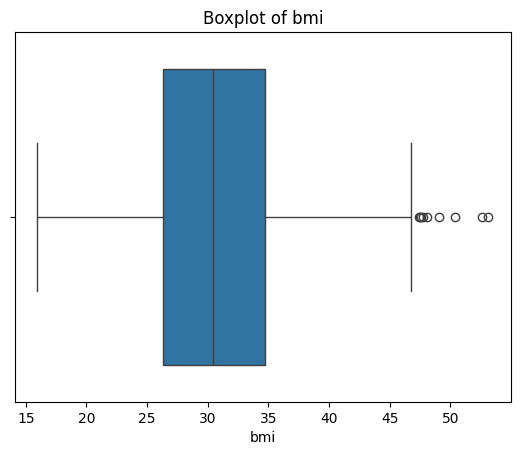

Original size: (1338, 7)
After removing outliers: (1329, 7)


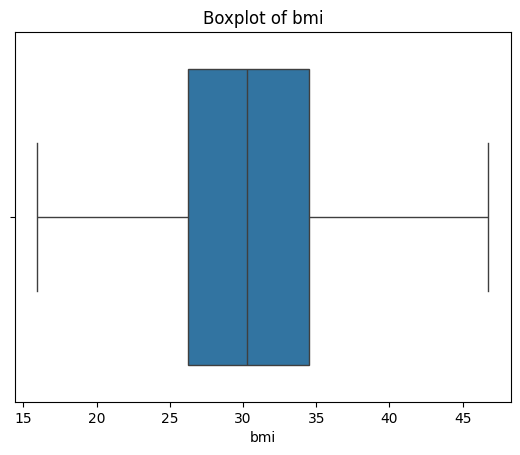